## AE201808 Næringsøkonomi  

Competition and cooperation in oligopolies: 

 “The Shrimp Game” 
----

The game 

* Atari, BMI and Commodore own the only three shrimp boats on the island of New Ålesund.  

* Each shrimper incurs the same cost of $5.00 per pound of shrimp they catch (this includes the opportunity cost of time) and each can catch at most 75 pounds per day.  

* At the end of each day, they bring their catch to the only market on the island where price is determined by market demand and the supply of fish, and all shrimp is sold. All shrimp goes bad after one day, so a shrimper cannot keep shrimps off the market and sell them the next day.  

    The mayor of New Ålesund is also the supervisor of this market. He/she controls the pounds caught by each shrimper and announces the day’s price for shrimp. 

*    Let QA, QB, and QC denote Atari’s, BMI’s and Commodore’s catch, respectively. Once each has decided when to stop fishing and has brought his or her shrimp to market, the price is determined by the following equation:  

$$ P (Q_A, Q_B, Q_C)  =  45 – [ 0.2 \times (QA + QB + QC ) ] $$

* Each shrimper agrees that the above equation correctly predicts the market price of shrimp, and each tries to catch enough shrimp so as to maximize his or her dollar profits.  

* The profits $\pi$ for each shrimper equals the number of pounds caught multiplied by its profit margin, that is:   

$$ \pi_A (Q_A, Q_B, Q_C) = Q_A \left[ P (Q_A, Q_B, Q_C) – 5 \right]$$

* The three shrimpers have a history of family feuds and no personal contact. Each will have to set its shrimp production for the day without knowing what levels the other two shrimpers set. However, as described above, at the end of each day the production levels that were set by each shrimper will become public knowledge. 

# Simuleringsoppgave i Python :)
* Vi vil lage et pythonprogram som simulerer ulike strategier fiskerene kan velge
* Fek:
  - Fisk så mye som mulig
  - Fisk tilfeldig mengde
  - Se på hvor mye konkurrentene har tidligere har fisket, og fisk optimal mengde (*Cournot modellen*)


14.62517869991133
29.504381412858987
18.633688226053856
73.76502044536797
7.409616614009621
27.81065949816184
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5
 56.  56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5
 63.  63.5 64.  64.5 65.  65.5 66.  66.5 67.  67.5 68.  68.5 69.  69.5
 70.  70.5 71.  71.5 72.  72.5 73.  73.5 74.  74.5]


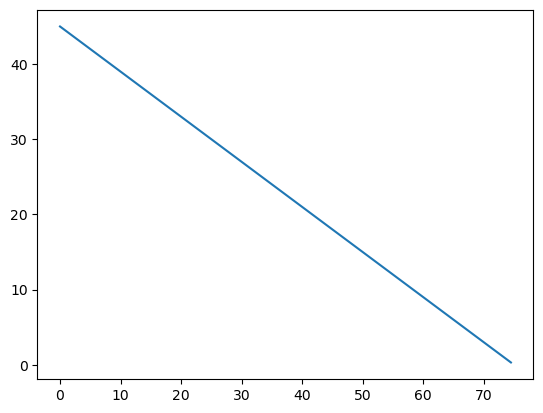

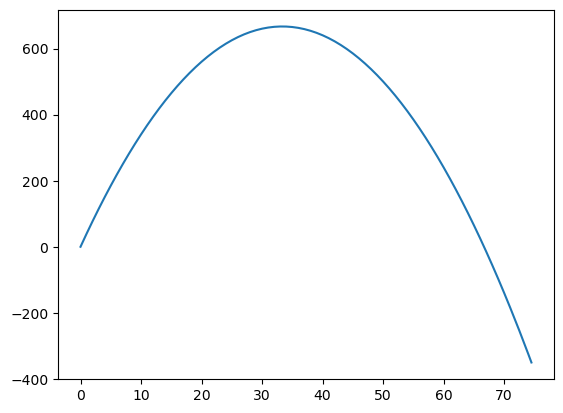

In [4]:
# Importere Bibliotek
import matplotlib.pyplot as plt
import random
import numpy as np

#Definerer parametre / konstanter
maks_last = 75 #kg
kost_fiske = 5 #kr/kg
n_baater = 3 #Båter per fisketur
n_totalt = 3*100 


#Lag P funksjon (markedspris)
def beregn_markedspris(Qa, Qb, Qc):
    pris = 45-(0.2*(Qa+Qb+Qc))
    return pris

#Lag profittfunksjon
def beregn_profit(Q,P):
    return Q*(P-kost_fiske)

#Sjekk om profit- og prisfunksjonene ser fornuftig ut
def sjekk_pris_profit():
    laster = np.arange(0,maks_last,0.5)
    print(laster)
    P_liste = [beregn_markedspris(q,q,q) for q in laster]
    plt.plot(laster,P_liste)
    plt.show()

    profitliste = [beregn_profit(q, beregn_markedspris(q,q,q)) for q in laster]
    plt.plot(laster, profitliste)
    plt.show()


def fisk_tilfeldig():
    return random.random()*maks_last
    
def lag_tilfeldig_skute():
    skute = {"navn": "Tilfeldig", 
         "saldo": 1000, 
         "tidligere_fangst": [], 
         "fangst": 0,
         "fiskefunksjon": fisk_tilfeldig}
    return skute



skuteliste = []
for i in range(n_totalt):
    skuteliste.append(lag_tilfeldig_skute())
    
#Simulere 1 fisketur for fiskeflåten

random.shuffle(skuteliste) #Stokk om på rekkefølge til skuter
for i in range(0,n_totalt,3): #Gå igjennom skutene i grupper på 3
    skutelag = skuteliste[i:i+3] #Liste med 3 skuter

    #Fisk reker
    for skute in skutelag:
        fiskefunksjon = skute["fiskefunksjon"]
        fangst = fiskefunksjon()
        skute["fangst"] = fangst
        skute["tidligere_fangst"].append(fangst)


    #Beregn markedspris
    Q1, Q2, Q3 = (skute["fangst"] for skute in skutelag)
    
    #Q1 = skutelag[0]["fangst"]
    #Q2 = skutelag[1]["fangst"]
    #Q3 = skutelag[2]["fangst"]

    markedspris = beregn_markedspris(Q1,Q2,Q3)

    #selg reker og oppdater saldo
    for skute in skutelag:
        skute["saldo"] += beregn_profit(skute["fangst"], markedspris)


#Sanity check

testskuter = skuteliste[:6]
for skute in testskuter:
    print(skute["fangst"])

sjekk_pris_profit()

#OPPGAVE
#Del inn i funksjoner:
#def simuler dag
#def fisk
#def beregn pris
#def oppdater pris
